## CodSoft
#### Data Science - Task 4 : Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as advertising expenditure, target audience segmentation, and advertising platform selection.
#### Dataset used: Sales Prediction (Simple Linear Regression) https://www.kaggle.com/code/ashydv/sales-prediction-simple-linear-regression/input

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading dataset

df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


#### Dataset information

In [3]:
df.shape

(200, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
# checking if any null values are present

df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

#### Data Visualizing

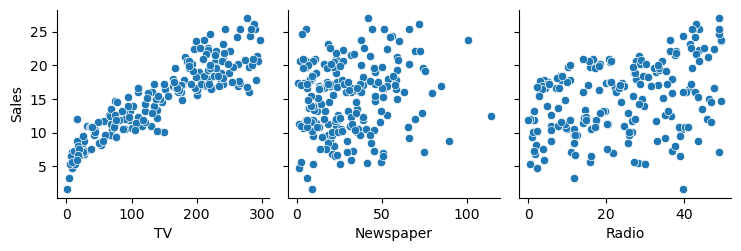

In [7]:
# checking how sales are related to features present in the dataset using Scatterplot
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', kind='scatter')
plt.show()

##### With the increase in advertisement in TV the sales are increasing but its unpredictable in Newspaper & Radio 

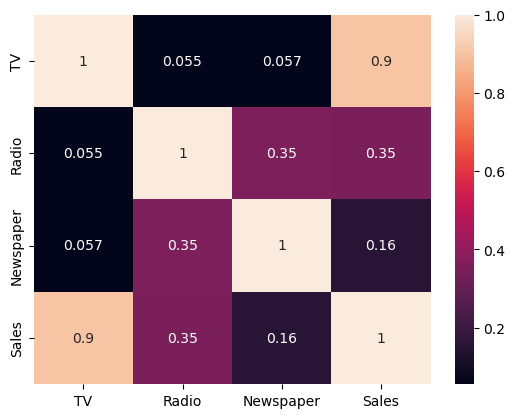

In [8]:
# heatmap will show the correlation between different variables 

sns.heatmap(df.corr(), annot = True)
plt.show()

##### it is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales

### Model Building

#### Train-Test Split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df[['TV']], df[['Sales']], test_size = 0.3, random_state = 100)

In [10]:
X_train.head()

,TV
74,213.4
3,151.5
185,205.0
26,142.9
90,134.3


In [11]:
Y_train.head()

,Sales
74,17.0
3,16.5
185,22.6
26,15.0
90,14.0


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [13]:
# applying trained model to make prediction (on test set)

Y_pred = model.predict(X_test)

#### Prediction results

In [14]:
# Printing model performance


print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [[0.05454575]]
Intercept: [6.9486832]
Mean squared error (MSE): 4.08
Coefficient of determination (R^2): 0.79


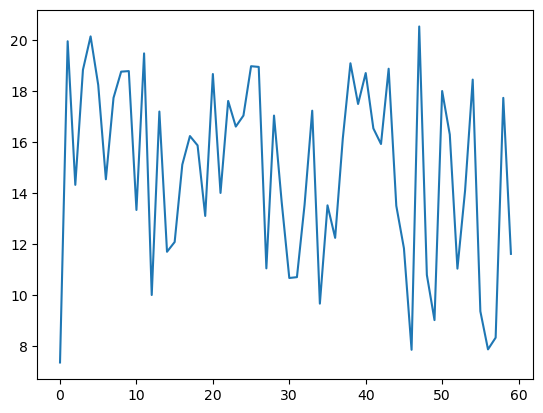

In [15]:
plt.plot(Y_pred)

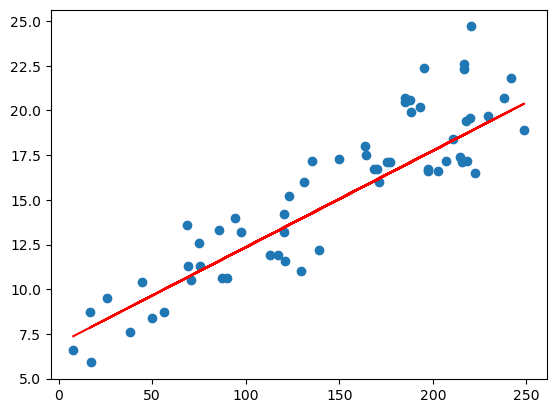

In [18]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()